## **EDA**

In [11]:
# Importo las librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings 
warnings.filterwarnings('ignore')

El análisis de los datos se hará con base a la expansión y mejora de la cobertura de red en Argentina, por ello el énfasis será el alcance y calidad de red y el conocer cuales fueron los principales motivos de quejas/reclamos.

Si bien se cuentan con datos desde el año 2014 hasta el 2022, mi ventana temporal de interés será de 4 años.

In [12]:
# Cargo los datasets

# Internet
acceso_internet = pd.read_csv('./Datasets limpios/acceso_internet.csv',sep=',')
banda_provincial = pd.read_csv('./Datasets limpios/banda_provincial.csv',sep=',')
ingresos_internet = pd.read_csv('./Datasets limpios/ingresos_internet.csv',sep=',')
internet_velocidad = pd.read_csv('./Datasets limpios/internet_velocidad.csv',sep=',')
mapa_conectividad = pd.read_csv('./Datasets limpios/mapa_conectividad.csv',sep=',')
tecnologia_localidad = pd.read_csv('./Datasets limpios/tecnologia_localidad.csv',sep=',')
tecnologia_provincia = pd.read_csv('./Datasets limpios/tecnologia_provincia.csv',sep=',')
# Telefonia fija
acceso_telefonia_fija = pd.read_csv('./Datasets limpios/acceso_telefonia_fija.csv',sep=',')
ingresos_telefonia_fija = pd.read_csv('./Datasets limpios/ingresos_telefonia_fija.csv',sep=',')
# Telefonia movil
acceso_telefonia_movil = pd.read_csv('./Datasets limpios/acceso_telefonia_movil.csv',sep=',')
# Denuncias y reclamos
denuncias_tipo = pd.read_csv('./Datasets limpios/denuncias_tipo.csv',sep=',')
reclamos_operador = pd.read_csv('./Datasets limpios/reclamos_operador.csv',sep=',')
reclamos_servicios = pd.read_csv('./Datasets limpios/reclamos_servicios.csv',sep=',')
reclamos_delegacion = pd.read_csv('./Datasets limpios/reclamos_delegacion.csv',sep=',')

## *DF: banda_procinvial*

In [13]:
banda_provincial_2018=banda_provincial[banda_provincial['Año']>=2018].reset_index(drop=True)
banda_provincial_2018

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,4788466,6199,4794665
1,2022,4,Capital Federal,1549781,2145,1551926
2,2022,4,Catamarca,70908,1,70909
3,2022,4,Chaco,143658,5,143663
4,2022,4,Chubut,167855,904,168759
...,...,...,...,...,...,...
475,2018,1,Santa Cruz,33970,435,34405
476,2018,1,Santa Fe,679717,309,680026
477,2018,1,Santiago Del Estero,82916,2,82918
478,2018,1,Tierra Del Fuego,31106,508,31614


Este dataset nos muestra la cantidad de accesos a Internet por banda ancha y banda angosta para cada provincia en cada trimestre.

A continuación se hará una pequeña y sencilla diferencia entre ambas considerando los aspectos más importantes.

Banda Ancha Fija:
* Velocidad: Ofrece conexiones de alta velocidad que permiten la transmisión rápida de datos y la realización de tareas en línea sin problemas, como la transmisión de video en alta definición y la descarga de archivos grandes.
* Fiabilidad: Es altamente confiable y constante, ya que la conexión está siempre activa y no se ve afectada por llamadas telefónicas.
* Costo: Suele ser más costosa debido a las velocidades más altas y la mayor capacidad de datos.
* Usos y Aplicaciones: Es adecuada para una amplia gama de actividades en línea, como trabajar desde casa, juegos en línea, videoconferencias y descargas rápidas.
* Disponibilidad: Más común en áreas urbanas y suburbanas, pero puede ser menos accesible en zonas rurales.

Dial-up (Acceso Telefónico):
* Velocidad: Es mucho más lento en comparación con la banda ancha fija y es limitado en términos de velocidad de transmisión de datos.
* Fiabilidad: Puede ser menos confiable, ya que la calidad de la conexión dial-up puede depender de la calidad de la línea telefónica y se puede ver interrumpida por llamadas telefónicas.
* Costo: Generalmente más económico en términos de tarifas mensuales debido a las velocidades más bajas.
* Usos y Aplicaciones: Se limita principalmente a actividades básicas en línea, como el correo electrónico y la navegación web. No es adecuado para tareas que requieran una gran cantidad de ancho de banda.
* Disponibilidad: Puede estar más disponible en áreas rurales debido a su uso de líneas telefónicas convencionales, pero su velocidad y capacidad son limitadas.

Se analizará como evoluciono a nivel nacional por año la cantidad de accesos por cada una.

In [14]:
banda_provincial_2018_4 = banda_provincial[(banda_provincial['Año'] >= 2018) & (banda_provincial['Trimestre'] == 4)].reset_index(drop=True)
banda_provincial_2018_4

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,4788466,6199,4794665
1,2022,4,Capital Federal,1549781,2145,1551926
2,2022,4,Catamarca,70908,1,70909
3,2022,4,Chaco,143658,5,143663
4,2022,4,Chubut,167855,904,168759
...,...,...,...,...,...,...
115,2018,4,Santa Cruz,24443,325,24768
116,2018,4,Santa Fe,720161,229,720390
117,2018,4,Santiago Del Estero,89333,2,89335
118,2018,4,Tierra Del Fuego,45716,544,46260


In [15]:
banda_provincial_2018_4.describe()

,Año,Trimestre,Banda ancha fija,Dial up,Total
count,120.000000,120.0,1.200000e+02,120.000000,1.200000e+02
mean,2020.000000,4.0,4.039087e+05,560.541667,4.044692e+05
std,1.420143,0.0,8.496276e+05,1416.742701,8.508754e+05
min,2018.000000,4.0,2.444300e+04,0.000000,2.476800e+04
25%,2019.000000,4.0,8.603550e+04,3.000000,8.610550e+04
50%,2020.000000,4.0,1.261460e+05,107.500000,1.263995e+05
75%,2021.000000,4.0,2.166292e+05,399.000000,2.171015e+05
max,2022.000000,4.0,4.788466e+06,10104.000000,4.794665e+06


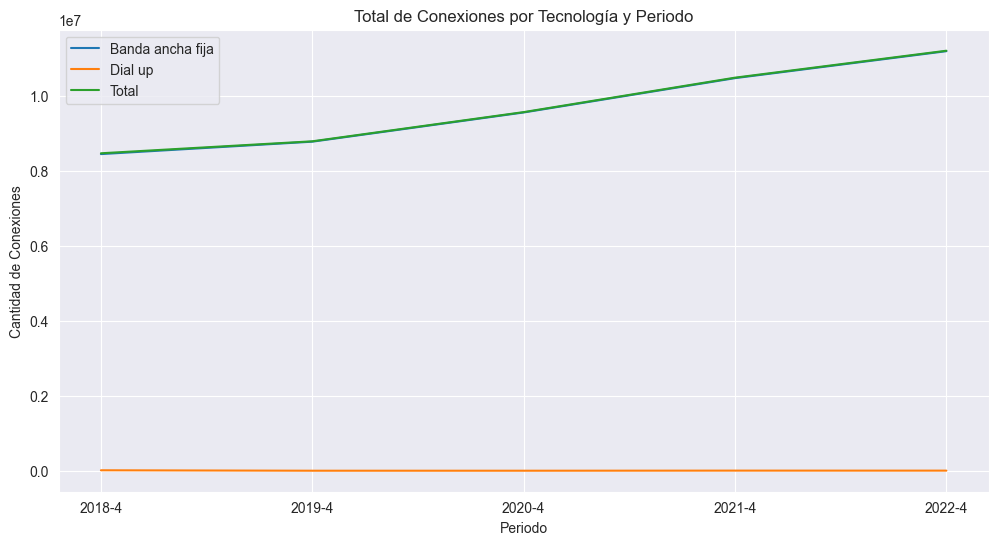

In [16]:
# Creo la columna "Periodo"
banda_provincial_2018_4['Periodo'] = banda_provincial_2018_4['Año'].astype(str) + '-' + banda_provincial_2018_4['Trimestre'].astype(str)

# Selecciono las columnas necesarias
tecnologias = ['Banda ancha fija', 'Dial up']
conexiones_totales_tecnologia_provincia = ['Año', 'Trimestre', 'Periodo'] + tecnologias

# Creo el nuevo DataFrame sumando los accesos por cada tecnología para todas las provincias
conexiones_totales_tecnologia_provincia = banda_provincial_2018_4[conexiones_totales_tecnologia_provincia].groupby(['Año', 'Trimestre', 'Periodo']).sum().reset_index()

# Calculo la columna "Total" como la suma de "Banda ancha fija" y "Dial up"
conexiones_totales_tecnologia_provincia['Total'] = conexiones_totales_tecnologia_provincia['Banda ancha fija'] + conexiones_totales_tecnologia_provincia['Dial up']

# Convierto el DataFrame en un formato largo para poder utilizar 'hue' en el gráfico de líneas
conexiones_totales_tecnologia_provincia = pd.melt(conexiones_totales_tecnologia_provincia, id_vars=['Año', "Trimestre", "Periodo"], var_name='Tecnologías', value_name='Cantidad de Conexiones')

# Creo el gráfico de líneas con 'hue' para los rangos de velocidad
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=conexiones_totales_tecnologia_provincia, x="Periodo", y='Cantidad de Conexiones', hue='Tecnologías')

# Establezco los títulos y etiquetas de los ejes
plt.title('Total de Conexiones por Tecnología y Periodo')
plt.xlabel('Periodo')
plt.ylabel('Cantidad de Conexiones')

# Roto las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation='horizontal')

# Muestro el gráfico
plt.legend()
plt.show()


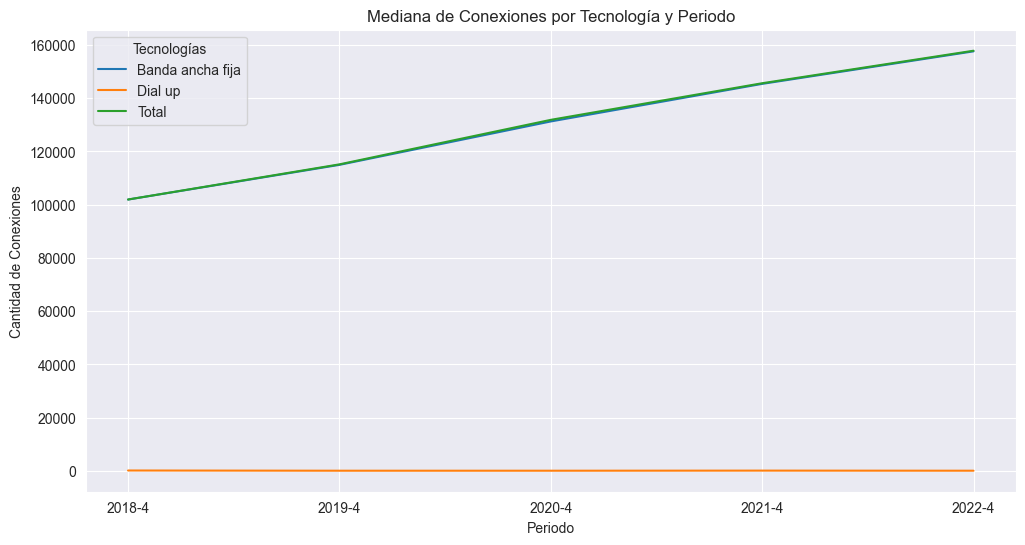

In [17]:
# Selecciono las columnas necesarias
tecnologias = ['Banda ancha fija', 'Dial up', 'Total']
conexiones_totales_tecnologia_provincia = ['Año', 'Trimestre', 'Periodo'] + tecnologias
# Creo el nuevo DataFrame sumando los accesos por cada tecnología para todas las provincias
conexiones_totales_tecnologia_provincia = banda_provincial_2018_4[conexiones_totales_tecnologia_provincia].groupby(['Año', 'Trimestre', 'Periodo']).median().reset_index()
# Convierto el DataFrame en un formato largo para poder utilizar 'hue' en el gráfico de líneas
conexiones_totales_tecnologia_provincia = pd.melt(conexiones_totales_tecnologia_provincia, id_vars=['Año', "Trimestre", "Periodo"], var_name='Tecnologías', value_name='Cantidad de Conexiones')
# Creo el gráfico de líneas con 'hue' para los rangos de velocidad
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=conexiones_totales_tecnologia_provincia, x="Periodo", y='Cantidad de Conexiones', hue='Tecnologías')
# Establezco los títulos y etiquetas de los ejes
plt.title('Mediana de Conexiones por Tecnología y Periodo')
plt.xlabel('Periodo')
plt.ylabel('Cantidad de Conexiones')
# Muestro el gráfico
plt.show()

A simple vista y desde la tabla, podemos observar que la cantidad de conexiones "Dial up" es insignificante en relación con la cantidad de conexiones "Banda ancha fija". La línea que representa la banda ancha angosta es practicamente horizontal, por lo que puede considerarse que es una tecnología poco preferible para los usuarios pero auq aún conserva una pequeña demanda.    
El gráfico nos ayuda a observar que la cantidad de accesos por "Banda ancha fija" es casi la cantidad total de accesos por sí sola.

## *DF: internet_velocidad*

In [18]:
internet_velocidad=internet_velocidad[internet_velocidad['Año']>=2018]
internet_velocidad

,Año,Trimestre,Provincia,Hasta 512kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,Otros,Total,Mbps (Media de bajada)
0,2022,4,Buenos Aires,28934,23347,259866,281550,244555,98670,3760109,97634,4794665,111.000000
1,2022,4,Capital Federal,516,5096,31320,64653,36336,8116,1299117,106772,1551926,182.860000
2,2022,4,Catamarca,71,315,2716,5028,4638,3122,52739,2280,70909,83.330000
3,2022,4,Chaco,461,771,16067,17846,6704,3039,94866,3909,143663,104.020000
4,2022,4,Chubut,109,1614,46457,31007,34728,15770,19048,20026,168759,15.920000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,2018,1,Santa Cruz,26,120,28600,655,100,1,3,4267,33772,5.189290
476,2018,1,Santa Fe,1359,33639,262008,108576,188900,39589,22801,23181,680053,11.173305
477,2018,1,Santiago Del Estero,41,2910,41298,18914,3449,33,2,17589,84236,6.248211
478,2018,1,Tierra Del Fuego,6,307,33987,2,0,0,0,107,34409,5.768082


Este dataset nos muestra la cantidad de conexiones por rangos de velocidad y la media de velocidad de bajada entre las provincias considerando año y trimestre.

In [19]:
internet_velocidad.describe()

,Año,Trimestre,Hasta 512kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,Otros,Total,Mbps (Media de bajada)
count,480.000000,480.0000,480.000000,480.000000,4.800000e+02,480.000000,480.000000,480.000000,4.800000e+02,480.000000,4.800000e+02,480.000000
mean,2020.000000,2.5000,2637.137500,4144.504167,1.055138e+05,43491.170833,43926.687500,33516.702083,1.519594e+05,9131.243750,3.943207e+05,23.947559
std,1.415689,1.1192,17944.509771,10129.715141,2.217934e+05,63279.978905,94872.690211,94907.432121,4.775371e+05,15541.071157,8.285758e+05,20.892831
min,2018.000000,1.0000,6.000000,0.000000,2.531000e+03,2.000000,0.000000,0.000000,0.000000e+00,-1945.000000,2.138200e+04,3.995131
25%,2019.000000,1.7500,41.000000,146.000000,2.739000e+04,6057.250000,6519.500000,690.250000,1.133750e+03,581.000000,8.260225e+04,9.380968
50%,2020.000000,2.5000,71.000000,957.000000,4.139650e+04,19037.500000,15498.000000,4997.000000,1.493350e+04,4396.000000,1.224580e+05,16.902311
75%,2021.000000,3.2500,168.000000,3328.750000,7.514350e+04,52472.000000,31553.500000,16555.500000,5.493450e+04,11837.000000,2.100140e+05,31.637903
max,2022.000000,4.0000,238920.000000,81354.000000,1.459443e+06,331292.000000,886678.000000,949093.000000,3.760109e+06,120464.000000,4.794665e+06,182.860000


Debido a que la desviación en el rango de velocidades es bastante elevado, en lugar de trabajar con la media se trabajará con la mediana.

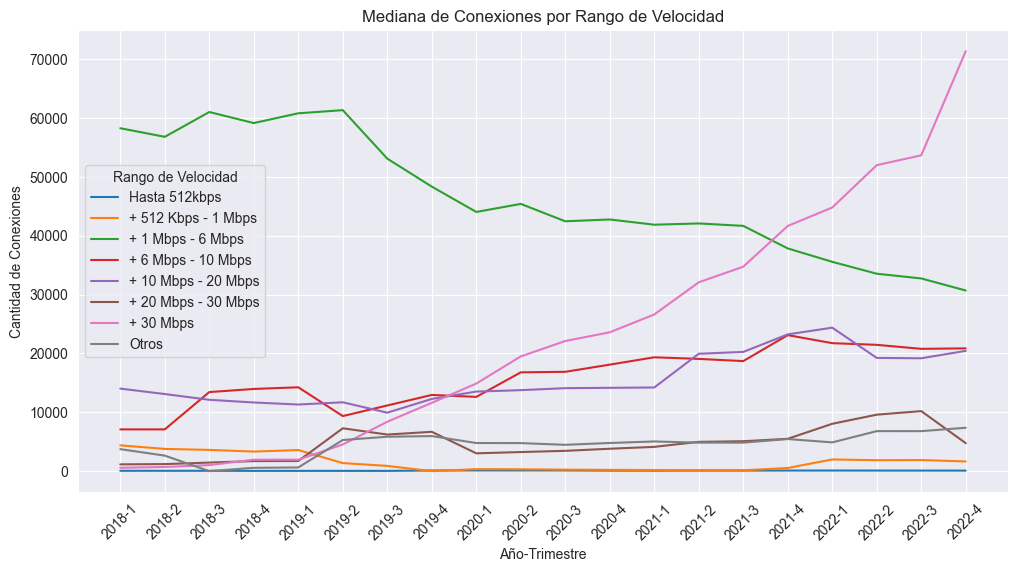

In [20]:
# Armo el dataframe a analizar
rango_velocidad = internet_velocidad[['Año', 'Trimestre', 'Hasta 512kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'Otros']].copy()
# Calcula la cantidad de las conexiones agrupando por año y rango de velocidad
conexiones_por_año = rango_velocidad.groupby(['Año', "Trimestre"]).median().reset_index()
# Convierte el DataFrame en un formato largo para poder utilizar 'hue' en el gráfico de líneas
sumas_largo = pd.melt(conexiones_por_año, id_vars=['Año', "Trimestre"], var_name='Rango de Velocidad', value_name='Mediana de Conexiones')
# Creo una nueva columna que concatene el año con el trimestre:
sumas_largo["Año_Trim"]= sumas_largo["Año"].astype(str) + "-" + sumas_largo["Trimestre"].astype(str)
# Crea el gráfico de líneas con 'hue' para los rangos de velocidad
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=sumas_largo, x="Año_Trim", y='Mediana de Conexiones', hue='Rango de Velocidad')
# Establece los títulos y etiquetas de los ejes
plt.title('Mediana de Conexiones por Rango de Velocidad')
plt.xlabel('Año-Trimestre')
plt.ylabel('Cantidad de Conexiones')
plt.xticks(rotation=45)
# Muestra el gráfico
plt.show()

Durante los primeros años, el rango de velocidades más prominente oscilaba entre los 1-6 Mbps.

A partir del 2do trimestre del año 2019, se pueden observar que:
* Las redes inferiores a 1 Mbps se mantuvieron practicamente iguales en demanda.
* Las redes entre 1 a 6 Mbps, empezaron a disminuir con una pendiente considerable.
* Las redes superiores a 6 Mbps, empezarón a ser más demandas para el consumo de los usuarios. Siendo aquellas que presentaron una mayor pendiente de crecimiento las redes superiores a 30 Mbps.

Analizaremos la evolucion durante el útimo trimestre de cada provincia

In [21]:
internet_trimestral_prov=internet_velocidad[internet_velocidad['Trimestre']==4]
internet_trimestral_prov['Periodo'] = internet_trimestral_prov['Año'].astype(str) + '-' + internet_trimestral_prov['Trimestre'].astype(str)
internet_trimestral_prov = internet_trimestral_prov.groupby(['Provincia', "Año",'Periodo'])['Total'].sum().reset_index()
internet_trimestral_prov

,Provincia,Año,Periodo,Total
0,Buenos Aires,2018,2018-4,3636606
1,Buenos Aires,2019,2019-4,3686254
2,Buenos Aires,2020,2020-4,4033261
3,Buenos Aires,2021,2021-4,4509157
4,Buenos Aires,2022,2022-4,4794665
...,...,...,...,...
115,Tucumán,2018,2018-4,172004
116,Tucumán,2019,2019-4,198644
117,Tucumán,2020,2020-4,231089
118,Tucumán,2021,2021-4,238639


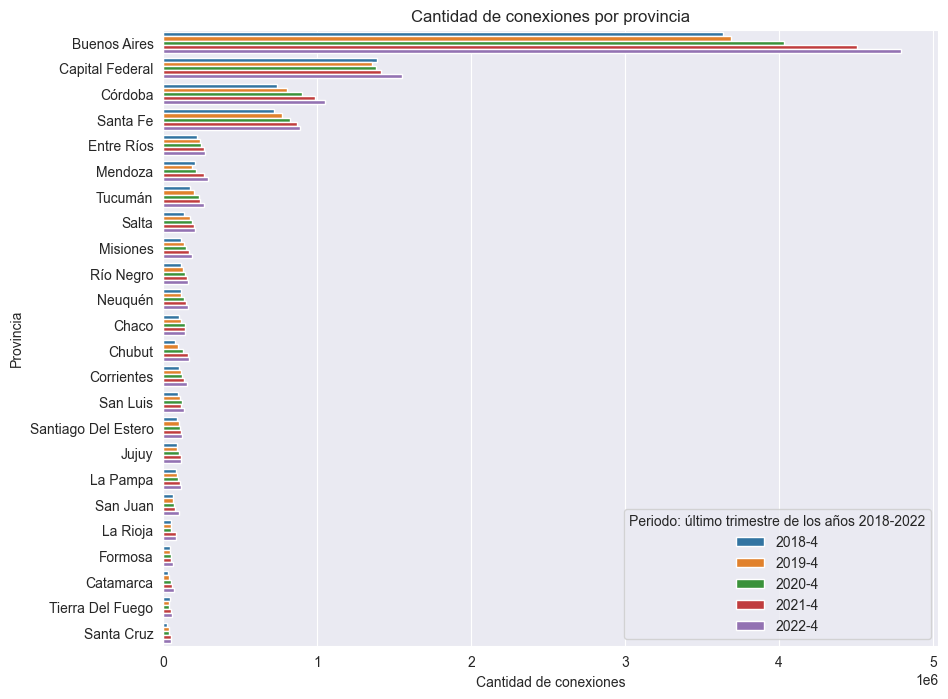

In [22]:
# Creo una lista de las provincias por la cantidad total de conexiones en orden descendente
provincias_ordenadas = internet_trimestral_prov.groupby('Provincia')['Total'].sum().sort_values(ascending=False).index.tolist()
# Crear el gráfico de barras con hue
plt.figure(figsize=(10, 8))
sns.barplot(x='Total', y='Provincia', hue='Periodo', data=internet_trimestral_prov, order=provincias_ordenadas)
# Configurar las etiquetas
plt.xlabel('Cantidad de conexiones')
plt.ylabel('Provincia')
plt.title('Cantidad de conexiones por provincia')
plt.legend(title='Periodo: último trimestre de los años 2018-2022')
# Mostrar el gráfico
plt.show()

En esta ocasión,se tomará el porcentaje de conexiones con respecto a la población de cada provincia. La cantidad de habitantes de cada provincia se obtiene de la proyección realizada por el INDEC.

In [23]:
poblacion_nac=pd.read_csv('./Datasets limpios/poblacion_nac.csv',sep=',')
poblacion_nac=poblacion_nac[(poblacion_nac['Año'] >= 2018) & (poblacion_nac['Año'] <= 2022)].reset_index(drop=True)
poblacion_nac

,Año,Poblacion,Provincia
0,2018,3068043,Capital Federal
1,2019,3072029,Capital Federal
2,2020,3075646,Capital Federal
3,2021,3078836,Capital Federal
4,2022,3081550,Capital Federal
...,...,...,...
115,2018,164944,Tierra Del Fuego
116,2019,169183,Tierra Del Fuego
117,2020,173432,Tierra Del Fuego
118,2021,177697,Tierra Del Fuego


In [24]:
# Realizo el merge entre los DataFrames:
internet_trimestral_prov_poblacion = pd.merge(internet_trimestral_prov, poblacion_nac, on=['Provincia', "Año"])
internet_trimestral_prov_poblacion.head()

,Provincia,Año,Periodo,Total,Poblacion
0,Buenos Aires,2018,2018-4,3636606,17196396
1,Buenos Aires,2019,2019-4,3686254,17370144
2,Buenos Aires,2020,2020-4,4033261,17541141
3,Buenos Aires,2021,2021-4,4509157,17709598
4,Buenos Aires,2022,2022-4,4794665,17875743


In [25]:
# Creo la columna con el porcentaje del número de conexiones respecto a la población:
internet_trimestral_prov_poblacion["Porcentaje_conexiones"]= internet_trimestral_prov_poblacion["Total"]/internet_trimestral_prov_poblacion["Poblacion"]
internet_trimestral_prov_poblacion

,Provincia,Año,Periodo,Total,Poblacion,Porcentaje_conexiones
0,Buenos Aires,2018,2018-4,3636606,17196396,0.211475
1,Buenos Aires,2019,2019-4,3686254,17370144,0.212218
2,Buenos Aires,2020,2020-4,4033261,17541141,0.229932
3,Buenos Aires,2021,2021-4,4509157,17709598,0.254617
4,Buenos Aires,2022,2022-4,4794665,17875743,0.268222
...,...,...,...,...,...,...
115,Tucumán,2018,2018-4,172004,1654388,0.103968
116,Tucumán,2019,2019-4,198644,1674622,0.118620
117,Tucumán,2020,2020-4,231089,1694656,0.136363
118,Tucumán,2021,2021-4,238639,1714487,0.139190


In [26]:
internet_trimestral_prov_poblacion.to_csv('./Datasets KPI/internet_trimestral_prov_poblacion.csv',index=False)

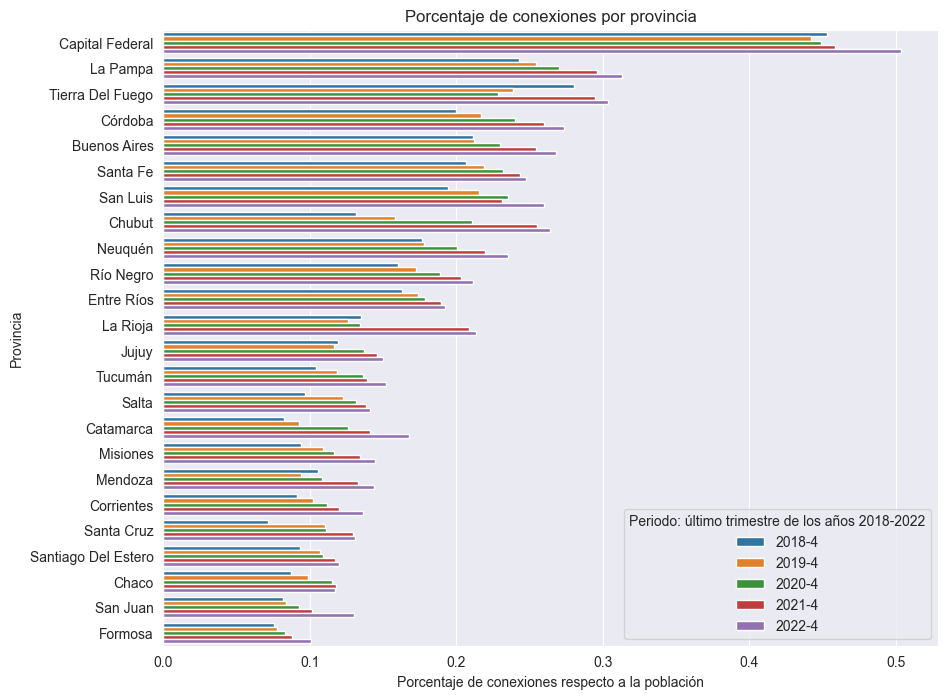

In [27]:
# Creo una lista de las provincias por la cantidad total de conexiones en orden descendente
provincias_ordenadas = internet_trimestral_prov_poblacion.groupby('Provincia')['Porcentaje_conexiones'].sum().sort_values(ascending=False).index.tolist()

# Crear el gráfico de barras con hue
plt.figure(figsize=(10, 8))
sns.barplot(x='Porcentaje_conexiones', y='Provincia', hue='Periodo', data=internet_trimestral_prov_poblacion, order=provincias_ordenadas)

# Configurar las etiquetas
plt.xlabel('Porcentaje de conexiones respecto a la población')
plt.ylabel('Provincia')
plt.title('Porcentaje de conexiones por provincia')
plt.legend(title='Periodo: último trimestre de los años 2018-2022')

# Mostrar el gráfico
plt.show()

Haciendo un paralelismo entre los años 2018 y 2022

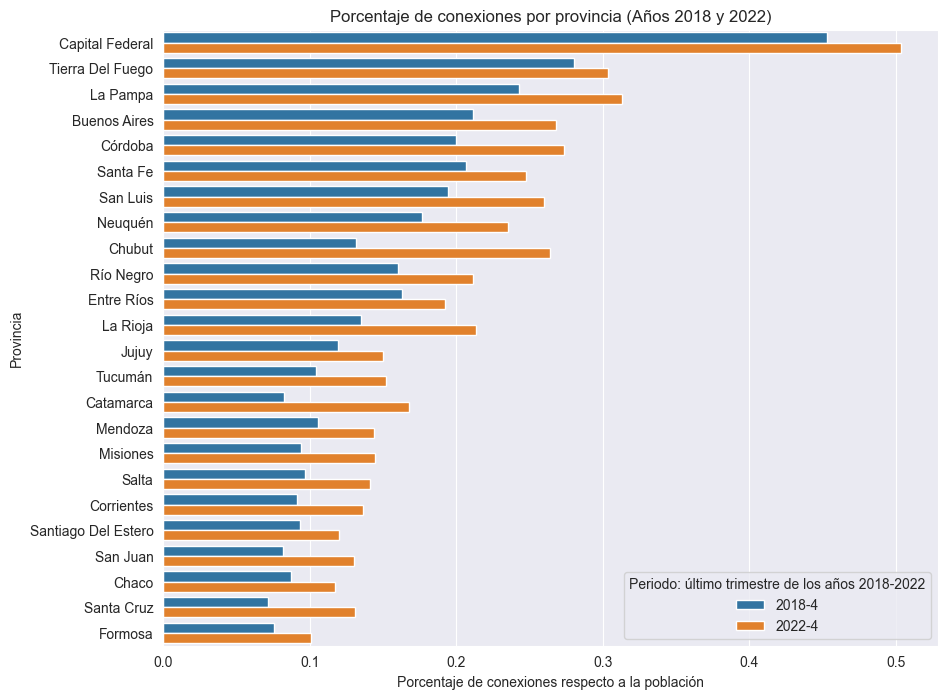

In [28]:
# Filtrar el DataFrame para incluir solo los años 2018 y 2022
años_seleccionados = [2018, 2022]
internet_filtrado = internet_trimestral_prov_poblacion[internet_trimestral_prov_poblacion['Año'].isin(años_seleccionados)]

# Crear una lista de las provincias por la cantidad total de conexiones en orden descendente
provincias_ordenadas = internet_filtrado.groupby('Provincia')['Porcentaje_conexiones'].sum().sort_values(ascending=False).index.tolist()

# Crear el gráfico de barras con hue
plt.figure(figsize=(10, 8))
sns.barplot(x='Porcentaje_conexiones', y='Provincia', hue='Periodo', data=internet_filtrado, order=provincias_ordenadas)

# Configurar las etiquetas
plt.xlabel('Porcentaje de conexiones respecto a la población')
plt.ylabel('Provincia')
plt.title('Porcentaje de conexiones por provincia (Años 2018 y 2022)')
plt.legend(title='Periodo: último trimestre de los años 2018-2022')

# Mostrar el gráfico
plt.show()


Podemos observar que todas las provincias han experimentado un crecimiento en la cantidad de conexiones durante los últimos 5 años, siendo la que posee el mayor porcentaje Capital Federal.    
Sin embargo no todas las provincias han conseguido el mismo porcentaje de creciemiento. Veremos cuales fueron las provincias cuyo porcentaje es menor al 0.15

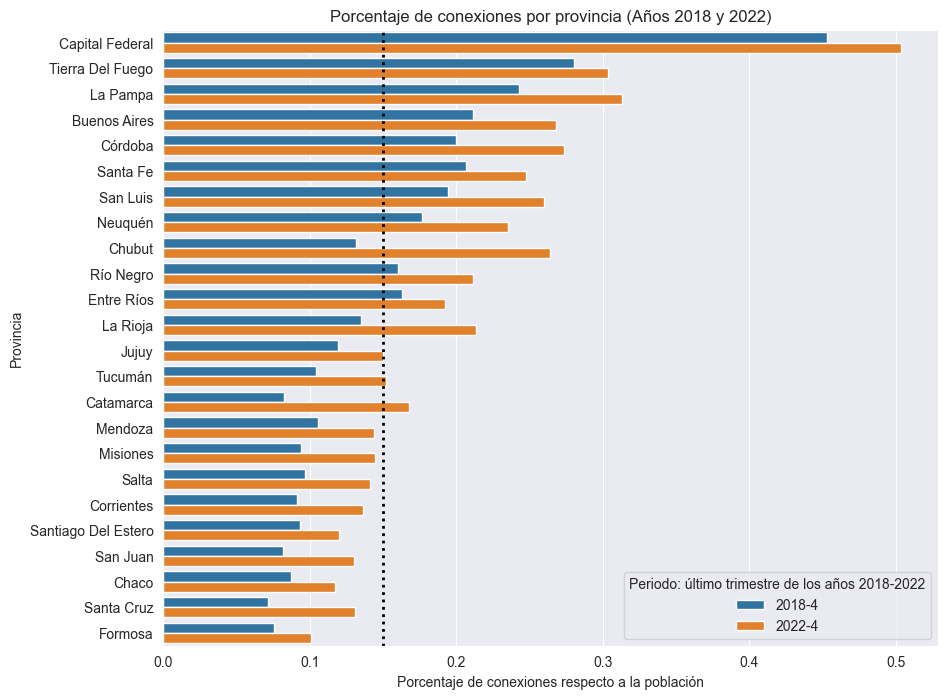

In [29]:
# Crear el gráfico de barras con hue
plt.figure(figsize=(10, 8))
sns.barplot(x='Porcentaje_conexiones', y='Provincia', hue='Periodo', data=internet_filtrado, order=provincias_ordenadas)
# Configurar las etiquetas
plt.xlabel('Porcentaje de conexiones respecto a la población')
plt.ylabel('Provincia')
plt.title('Porcentaje de conexiones por provincia (Años 2018 y 2022)')
plt.legend(title='Periodo: último trimestre de los años 2018-2022')
plt.axvline(x=0.15, color='black', linestyle='dotted', linewidth=2, label='Línea en X=0.15')
# Mostrar el gráfico
plt.savefig('./resources/porcentaje_conexiones_menores_1,5.jpg')
plt.show()

In [30]:
internet_filtrado[(internet_filtrado['Porcentaje_conexiones'] <= 0.15) & (internet_filtrado['Año'] == 2022)]

,Provincia,Año,Periodo,Total,Poblacion,Porcentaje_conexiones
19,Chaco,2022,2022-4,143663,1227736,0.117015
29,Corrientes,2022,2022-4,155453,1139604,0.136410
44,Formosa,2022,2022-4,61840,614706,0.100601
64,Mendoza,2022,2022-4,292104,2030061,0.143889
69,Misiones,2022,2022-4,186269,1288476,0.144565
84,Salta,2022,2022-4,205860,1459378,0.141060
89,San Juan,2022,2022-4,103826,797697,0.130157
99,Santa Cruz,2022,2022-4,50203,383827,0.130796
109,Santiago Del Estero,2022,2022-4,119494,998093,0.119722


Estas provincias son: Chaco, Corrientes, Formosa, Mendoza, Misiones,Salta, San Juan, Santa Cruz y Santiago Del Estero. Esto indica que aproximadamente cada 10 personas, tan solo 1.5 de ellas posee conexión a Internet.

Se analizará el crecimiento porcentual de conexiones de cada provincia para poder determinar cuales fueron las de mayor y menor tamaño.

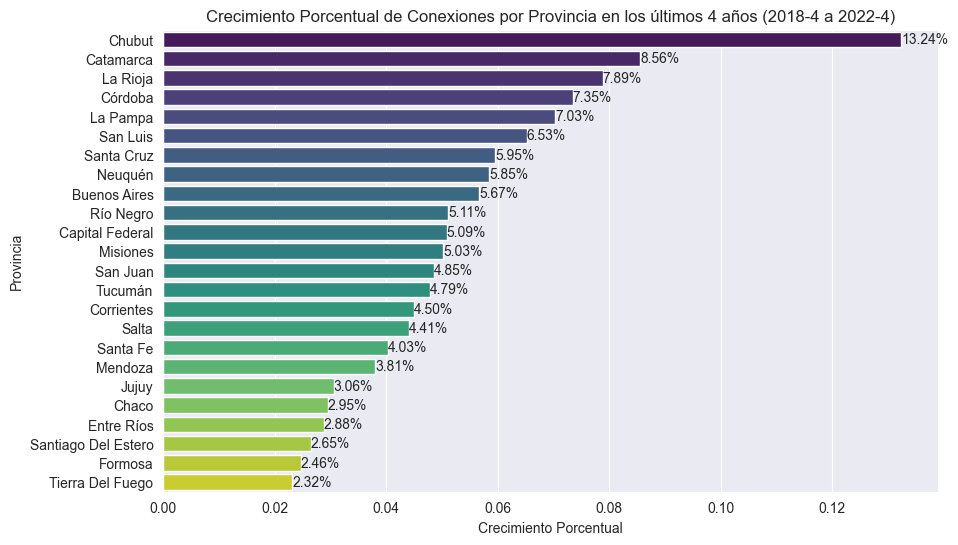

In [31]:
# Pivoteo la tabla
df_pivot = internet_filtrado.pivot(index='Provincia', columns='Periodo', values='Porcentaje_conexiones')
# Calculo el crecimiento porcentual
df_pivot['Crecimiento'] = df_pivot['2022-4'] - df_pivot['2018-4']
# Ordeno por el crecimiento de forma descendente
df_pivot.sort_values('Crecimiento', ascending=False, inplace=True)
# Creo el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Crecimiento', y=df_pivot.index, data=df_pivot, orient='h', palette='viridis')
# Configuro las etiquetas
plt.xlabel('Crecimiento Porcentual')
plt.ylabel('Provincia')
plt.title('Crecimiento Porcentual de Conexiones por Provincia en los últimos 4 años (2018-4 a 2022-4)')
# Muestro los valores en cada barra
for i, value in enumerate(df_pivot['Crecimiento']):
    plt.text(value, i, f'{value*100:.2f}%', ha='left', va='center')
plt.savefig('./resources/crecimeinto_porcentual_4_años.jpg')
plt.show()


*Este KPI "Crecimiento porcentual de cada provincia", nos permite observar el crecimiento porcentual de conexiones de cada provincia*

In [32]:
kpi1=df_pivot
promedio = df_pivot["Crecimiento"].mean() * 100
print(f"El promedio del crecimiento porcentual total de las provincias es {promedio:.2f} %")

El promedio del crecimiento porcentual total de las provincias es 5.25 %


Esto en totalidad representa un incremento de casi 1.3 % de crecimiento anual para toda la Argentina. Se buscará incrementar en un 1.5 % el crecimiento de conexiones en todas las provincias para el año 2023.

Otro análisis se realizará sobre la velocidad media de bajada de cada provincia.

Un aspecto importante de la calidad de la conexión es la velocidad de bajada.


In [33]:
internet_velocidad_media = internet_velocidad[['Año', 'Trimestre', 'Provincia', 'Mbps (Media de bajada)']]
internet_velocidad_media = internet_velocidad_media[internet_velocidad_media['Trimestre']==4].reset_index(drop=True)
internet_velocidad_media

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,4,Buenos Aires,111.000000
1,2022,4,Capital Federal,182.860000
2,2022,4,Catamarca,83.330000
3,2022,4,Chaco,104.020000
4,2022,4,Chubut,15.920000
...,...,...,...,...
115,2018,4,Santa Cruz,5.119507
116,2018,4,Santa Fe,13.179235
117,2018,4,Santiago Del Estero,6.309255
118,2018,4,Tierra Del Fuego,7.436562


Es la FCC (Federal Communications Commission) quien estableció como límite de de velocidad de bajada los 25Mbps a partir de los cuales se considera una conexión a Internet de alta calidad.    
Para salvaguardar cualquier fallo en cobertura, se fijará como límite los 30Mbps.

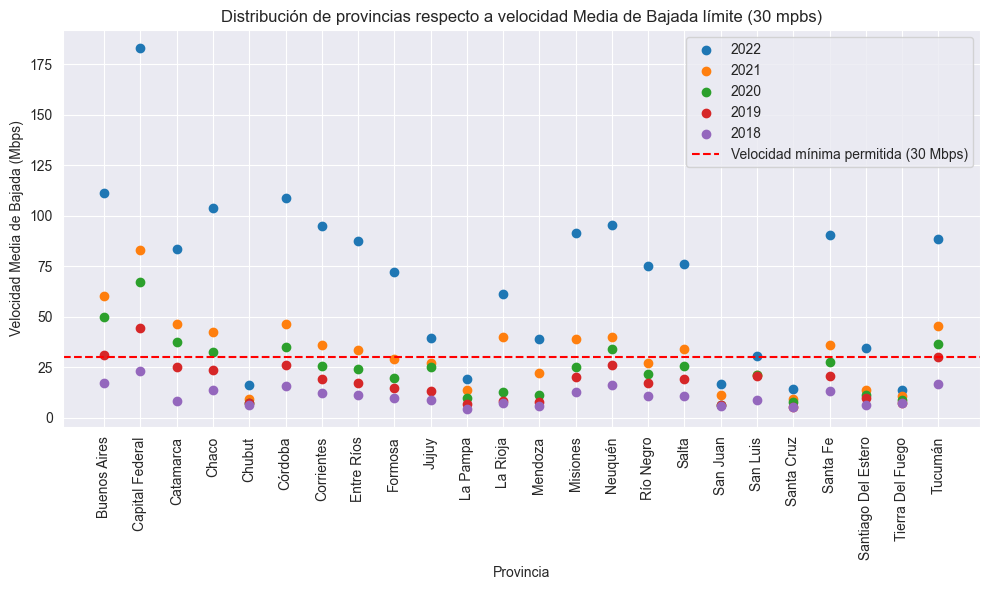

In [34]:
# Creao el gráfico
plt.figure(figsize=(10, 6))

for year in internet_velocidad_media['Año'].unique():
    df_year = internet_velocidad_media[internet_velocidad_media['Año'] == year]
    plt.scatter(df_year['Provincia'], df_year['Mbps (Media de bajada)'], label=year, alpha =1)

# Establezco una línea que divida las provincias que se encuentran por encima y debajo de la velocidad establecida (30mbps)
plt.axhline(y=30, color='red', linestyle='--', label='Velocidad mínima permitida (30 Mbps)')

plt.xlabel('Provincia')
plt.ylabel('Velocidad Media de Bajada (Mbps)')
plt.title("Distribución de provincias respecto a velocidad Media de Bajada límite (30 mpbs)")
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('./resources/distribución_vmb_anual.jpg')
plt.show()

Del gráfico podemos deducir:
* Para el año 2018 ninguna provincia cumplía con la condición de velocidad mínima.
* Las provincias que al año 2022 poseen una velocidad media de bajada menor a los 30Mbps establecidos son: Chubut, La Pampa, San Juan, Santa Cruz y Tierra Del Fuego. Esto demuestra que del total de 24 provincias, son solo 5 las provincias que poseen Internet de baja calidad en Argentina representando el 20.83 %.

Se analizará aquellas provincias que cuentan con los 30Mbps considerados, para ver como aumenta ese porcentaje de manera anual

In [35]:
# Obtengo el número de provincias por año con velocidad mayor a 30 Mbps
provincias_con_velocidad_mayor_30 = internet_velocidad_media[internet_velocidad_media['Mbps (Media de bajada)'] >= 30].groupby('Año')['Provincia'].nunique()

# Calculo el porcentaje de provincias con velocidad mayor a 30 Mbps para cada año
total_provincias = 24  # Considerando que hay 24 provincias en total
porcentaje_provincias_mayor_30 = (provincias_con_velocidad_mayor_30 / total_provincias) 

# Creao una nueva columna en el DataFrame con los porcentajes calculados
internet_velocidad_media['Porcentaje_Provincias_Mayor_30'] = internet_velocidad_media['Año'].map(porcentaje_provincias_mayor_30)

# LLeno los nulos con 0 (años en los que el porcentaje haya sido nulo)
internet_velocidad_media.fillna(0, inplace=True)

# Reviso
internet_velocidad_media

,Año,Trimestre,Provincia,Mbps (Media de bajada),Porcentaje_Provincias_Mayor_30
0,2022,4,Buenos Aires,111.000000,0.791667
1,2022,4,Capital Federal,182.860000,0.791667
2,2022,4,Catamarca,83.330000,0.791667
3,2022,4,Chaco,104.020000,0.791667
4,2022,4,Chubut,15.920000,0.791667
...,...,...,...,...,...
115,2018,4,Santa Cruz,5.119507,0.000000
116,2018,4,Santa Fe,13.179235,0.000000
117,2018,4,Santiago Del Estero,6.309255,0.000000
118,2018,4,Tierra Del Fuego,7.436562,0.000000


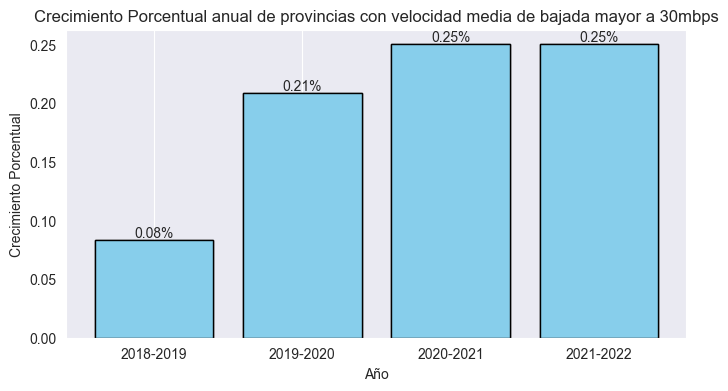

In [36]:
# Filtro los datos solo para las columnas 'Año' y 'Porcentaje_Provincias_Mayor_30'
data = internet_velocidad_media[['Año', 'Porcentaje_Provincias_Mayor_30']].copy()

# Reordeno los años de manera ascendente:
data.sort_values("Año", inplace=True)

# Elimino las filas duplicadas basadas en la columna 'Año'
data = data.drop_duplicates(subset='Año')

# Calculo el crecimiento porcentual entre años consecutivos
data['Crecimiento_Porcentual'] = (data['Porcentaje_Provincias_Mayor_30'].shift(-1) - data['Porcentaje_Provincias_Mayor_30'])

# Elimino la última fila que contendría un NaN en la columna de crecimiento porcentual
data = data.dropna()

# Creo la columna "Intervalo_Tiempo"
data["Intervalo_Tiempo"]= data["Año"].astype(str) + "-" + (data["Año"]+1).astype(str)

# Creo el gráfico de barras para el crecimiento porcentual por año
plt.figure(figsize=(8, 4))
plt.bar(data['Intervalo_Tiempo'], data['Crecimiento_Porcentual'], color='skyblue', edgecolor='black')
plt.xlabel('Año')
plt.ylabel('Crecimiento Porcentual')
plt.title("Crecimiento Porcentual anual de provincias con velocidad media de bajada mayor a 30mbps")
plt.grid(axis='y')

# Creo el gráfico de barras y agrego los valores en las barras
bars = plt.bar(data['Intervalo_Tiempo'], data['Crecimiento_Porcentual'], color='skyblue', edgecolor='black')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

plt.savefig('./resources/crecimiento_porcentual_provincias_mayor_30mbps.jpg')
plt.show()

In [37]:
kpi2_aux=data.copy()
print('El promedio de crecimiento porcentual es:',data.Crecimiento_Porcentual.mean())

El promedio de crecimiento porcentual es: 0.19791666666666666


Se observa que el porcentaje de provincias con vmb mayor o igual a 30 mbps se ha incrementado considerablemente año a año:
* Del 2018 al 2019, tan solo 2 provincias alcanzaron la vmb establecida como mínimo de calidad.
* Para el 2019-2020, pasaron a ser 7 las provincias con acceso de calidad.
* Para el 2020-2021, fueron 13 y finalmente en 2021-2022, fueron 19 provincias en total que cuentan con mas de 30Mpbs de bajada.

Sin embargo, aún casi el 21% de las provincias están por debajo de la vmb de 30 mbps, por lo que es importante poner el foco que aumentar este porcentaje, es decir, que más provincias superen el límite de velocidad establecido.     
Se observa también que el promedio de crecimiento porcentual en los últimos 4 años es del 19.79% (5% anual aproximadamente).

Debido a que el promedio de crecimiento porcentual en los 4 años fue de aprox 20 % (5% aprox por año), se establece como objetivo el creciemiento del 7.5 % (aprox 1.9 % por trimestre) para el año 2023; es decir que el porcentaje de provincias que poseean 30Mbps como mínimo será del 87%, o sea que sean 21 como mínimo las provincias que lleguen a los 30Mbps.

In [38]:
# KPI: "Crecimiento porcentual de provincias a 30Mbps"
kpi2=internet_velocidad_media

In [39]:
kpi2

,Año,Trimestre,Provincia,Mbps (Media de bajada),Porcentaje_Provincias_Mayor_30
0,2022,4,Buenos Aires,111.000000,0.791667
1,2022,4,Capital Federal,182.860000,0.791667
2,2022,4,Catamarca,83.330000,0.791667
3,2022,4,Chaco,104.020000,0.791667
4,2022,4,Chubut,15.920000,0.791667
...,...,...,...,...,...
115,2018,4,Santa Cruz,5.119507,0.000000
116,2018,4,Santa Fe,13.179235,0.000000
117,2018,4,Santiago Del Estero,6.309255,0.000000
118,2018,4,Tierra Del Fuego,7.436562,0.000000


## *DF: tecnologia_provincia*

In [40]:
tecnologia_provincia=tecnologia_provincia[tecnologia_provincia['Año']>=2018]
tecnologia_provincia

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra optica,Wireless,Otros,Total
0,2022,4,Buenos Aires,325908,2767247,1499149,129910,72451,4794665
1,2022,4,Capital Federal,138753,1238196,138548,4603,31826,1551926
2,2022,4,Catamarca,8952,10998,47337,1379,2243,70909
3,2022,4,Chaco,24582,61265,47285,7957,2574,143663
4,2022,4,Chubut,45450,73923,9815,30721,8850,168759
...,...,...,...,...,...,...,...,...,...
475,2018,1,Santa Cruz,18615,4474,1799,6734,2783,34405
476,2018,1,Santa Fe,341997,300421,10674,11636,15298,680026
477,2018,1,Santiago Del Estero,26788,54594,23,1432,81,82918
478,2018,1,Tierra Del Fuego,19372,9663,531,1,2047,31614


Este dataset nos muestra la cantidad de cada tipo de conexiones que hay para cada provincia.

In [41]:
tecnologia_provincia.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra optica,Wireless,Otros,Total
count,480.000000,480.0000,4.800000e+02,4.800000e+02,4.800000e+02,480.000000,480.000000,4.800000e+02
mean,2020.000000,2.5000,1.015790e+05,2.143027e+05,5.315492e+04,16366.385417,8917.681250,3.943207e+05
std,1.415689,1.1192,1.907332e+05,5.018679e+05,1.738762e+05,23056.514904,12593.769801,8.283997e+05
min,2018.000000,1.0000,6.120000e+03,3.146000e+03,0.000000e+00,0.000000,29.000000,2.139600e+04
25%,2019.000000,1.7500,1.990175e+04,2.308300e+04,9.090000e+02,2755.250000,1046.250000,8.279375e+04
50%,2020.000000,2.5000,4.293950e+04,5.419950e+04,9.656500e+03,7248.500000,3270.500000,1.223850e+05
75%,2021.000000,3.2500,9.064450e+04,8.188975e+04,2.972575e+04,18381.500000,12331.750000,2.072188e+05
max,2022.000000,4.0000,1.452061e+06,2.767247e+06,1.499149e+06,129910.000000,73415.000000,4.794665e+06


Podemos observar que debido a la media, Cablemodem es el tipo de accesso que más abunda; mientras los de menor medida son Wireless y Otros.

Se analizará la evolución anual de conexiones a Internet por teconología

In [42]:
# Filtro por primer trimestre
tecnologia_provincia_ult_Trim = tecnologia_provincia[tecnologia_provincia['Trimestre'] == 4].reset_index(drop=True)
# Creo la columna "Periodo"
tecnologia_provincia_ult_Trim['Periodo'] = tecnologia_provincia_ult_Trim['Año'].astype(str) + '-' + tecnologia_provincia_ult_Trim['Trimestre'].astype(str)
tecnologia_provincia_ult_Trim

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra optica,Wireless,Otros,Total,Periodo
0,2022,4,Buenos Aires,325908,2767247,1499149,129910,72451,4794665,2022-4
1,2022,4,Capital Federal,138753,1238196,138548,4603,31826,1551926,2022-4
2,2022,4,Catamarca,8952,10998,47337,1379,2243,70909,2022-4
3,2022,4,Chaco,24582,61265,47285,7957,2574,143663,2022-4
4,2022,4,Chubut,45450,73923,9815,30721,8850,168759,2022-4
...,...,...,...,...,...,...,...,...,...,...
115,2018,4,Santa Cruz,10659,4615,382,6378,2734,24768,2018-4
116,2018,4,Santa Fe,335519,322782,14387,18705,28997,720390,2018-4
117,2018,4,Santiago Del Estero,25339,61243,23,2649,81,89335,2018-4
118,2018,4,Tierra Del Fuego,19789,23349,1623,0,1499,46260,2018-4


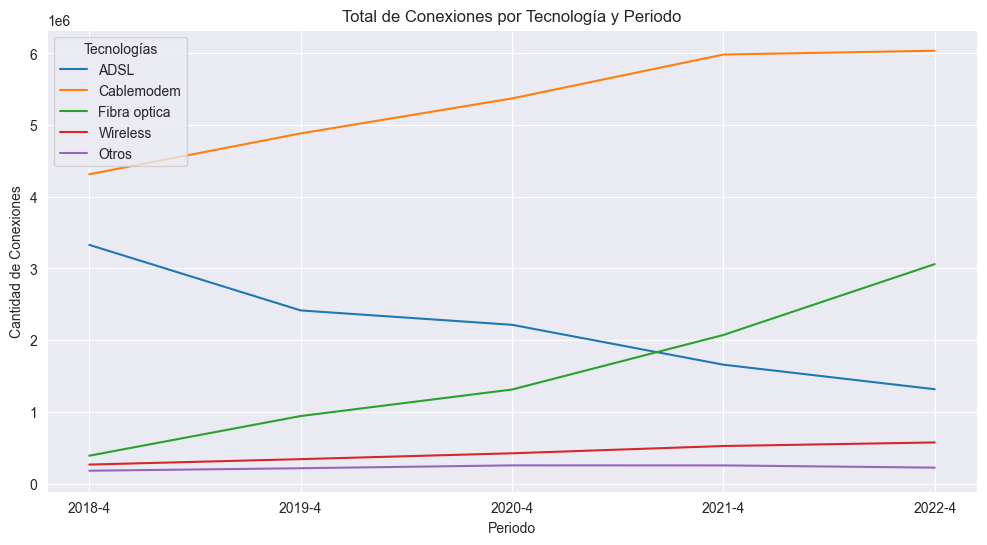

In [43]:
# Selecciono las columnas necesarias
tecnologias = ['ADSL', 'Cablemodem', 'Fibra optica', 'Wireless', 'Otros']
conexiones_totales_tecnologia_provincia = ['Año', 'Trimestre', 'Periodo'] + tecnologias
# Creo el nuevo DataFrame sumando los accesos por cada tecnología para todas las provincias
conexiones_totales_tecnologia_provincia = tecnologia_provincia_ult_Trim[conexiones_totales_tecnologia_provincia].groupby(['Año', 'Trimestre', 'Periodo']).sum().reset_index()
conexiones_totales_tecnologia_provincia
# Convierto el DataFrame en un formato largo para poder utilizar 'hue' en el gráfico de líneas
conexiones_totales_tecnologia_provincia = pd.melt(conexiones_totales_tecnologia_provincia, id_vars=['Año', "Trimestre", "Periodo"], var_name='Tecnologías', value_name='Cantidad de Conexiones')
# Creo el gráfico de líneas con 'hue' para los rangos de velocidad
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=conexiones_totales_tecnologia_provincia, x="Periodo", y='Cantidad de Conexiones', hue='Tecnologías')
# Establezco los títulos y etiquetas de los ejes
plt.title('Total de Conexiones por Tecnología y Periodo')
plt.xlabel('Periodo')
plt.ylabel('Cantidad de Conexiones')
# Muestro el gráfico
plt.show()

Utilizando la mediana

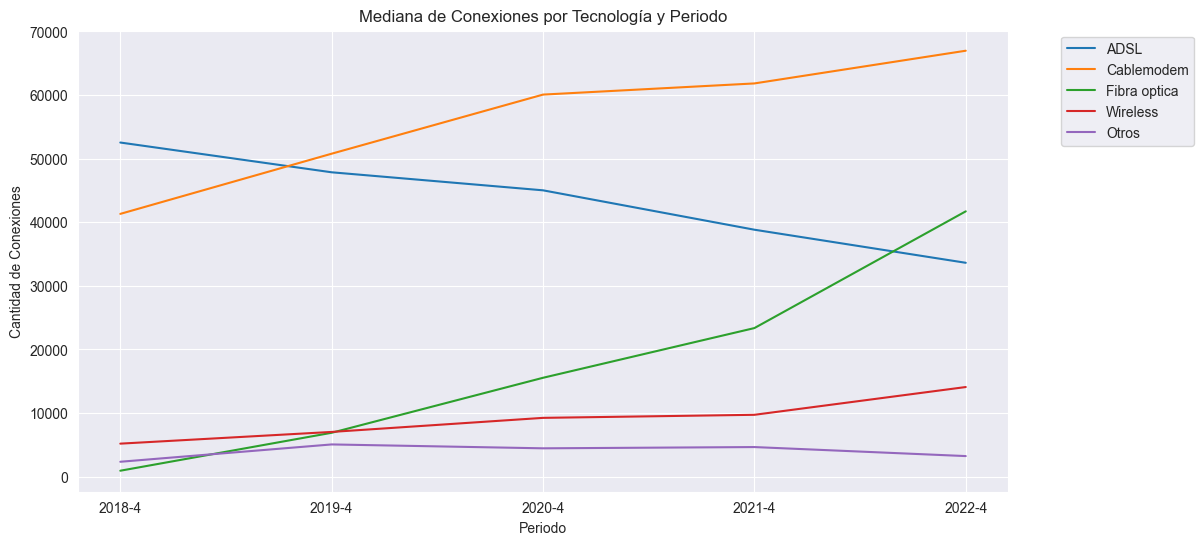

In [44]:
# Selecciono las columnas necesarias
tecnologias = ['ADSL', 'Cablemodem', 'Fibra optica', 'Wireless', 'Otros']
conexiones_totales_tecnologia_provincia = ['Año', 'Trimestre', 'Periodo'] + tecnologias
# Creo el nuevo DataFrame sumando los accesos por cada tecnología para todas las provincias
conexiones_totales_tecnologia_provincia = tecnologia_provincia_ult_Trim[conexiones_totales_tecnologia_provincia].groupby(['Año', 'Trimestre', 'Periodo']).median().reset_index()
conexiones_totales_tecnologia_provincia
# Convierto el DataFrame en un formato largo para poder utilizar 'hue' en el gráfico de líneas
conexiones_totales_tecnologia_provincia = pd.melt(conexiones_totales_tecnologia_provincia, id_vars=['Año', "Trimestre", "Periodo"], var_name='Tecnologías', value_name='Cantidad de Conexiones')
# Creo el gráfico de líneas con 'hue' para los rangos de velocidad
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=conexiones_totales_tecnologia_provincia, x="Periodo", y='Cantidad de Conexiones', hue='Tecnologías')
# Establezco los títulos y etiquetas de los ejes
plt.title('Mediana de Conexiones por Tecnología y Periodo')
plt.xlabel('Periodo')
plt.ylabel('Cantidad de Conexiones')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# Muestro el gráfico
plt.show()

Del gráfico se puede deducir:
* Pese a que a finales del año 2018 la tecnología más usada por los usuarios era la ADSL, en el año 2019 empezó a experimentar una bajada de demanda. Al contrario de Cablemodem que empezó a experimentar un incremento.
* La Fibra optica era la teconología menos empleada hasta que en 2019 sufrió un incremento abrupto superando a Wireless, Otros y ADSL. 
* La tecnología que mejor representa actualmente a Argentina a nivel nacional y a nivel provincial es Cablemodem, completando el top 3 Fibra Óptica y ADSL.
* En general, se deduce una "migración" desde la tecnología ADLS hacia, principalmente, Cablemodem y Fibra Óptica.

Se analizará la situación tecnológica de cada provincia durante el último trimestre de 2022

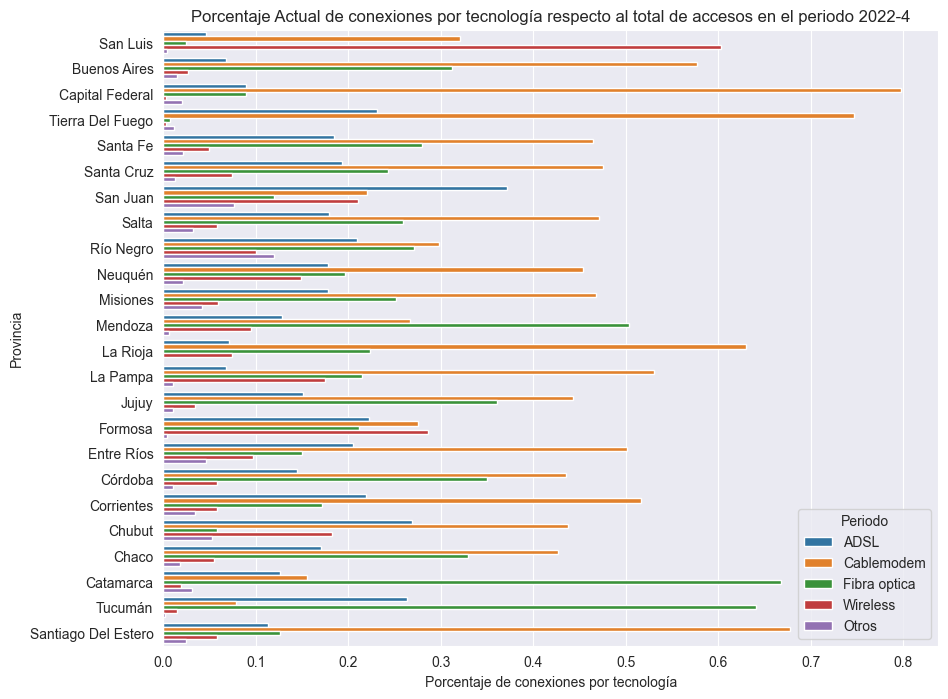

In [45]:
# Creo la columna "Periodo"
tecnologia_provincia_ult_Trim['Periodo'] = tecnologia_provincia_ult_Trim['Año'].astype(str) + '-' + tecnologia_provincia_ult_Trim['Trimestre'].astype(str)
internet_prov_ult_Trim_porc_total=tecnologia_provincia_ult_Trim[["Periodo", "Provincia", "ADSL", "Cablemodem", "Fibra optica", "Wireless", "Otros", "Total"]]
# Obtengo el porcentaje de accesos de cada tecnología con respecto al total:
internet_prov_ult_Trim_porc_total["ADSL"]= tecnologia_provincia_ult_Trim["ADSL"]/tecnologia_provincia_ult_Trim["Total"]
internet_prov_ult_Trim_porc_total["Cablemodem"]= tecnologia_provincia_ult_Trim["Cablemodem"]/tecnologia_provincia_ult_Trim["Total"]
internet_prov_ult_Trim_porc_total["Fibra optica"]= tecnologia_provincia_ult_Trim["Fibra optica"]/tecnologia_provincia_ult_Trim["Total"]
internet_prov_ult_Trim_porc_total["Wireless"]= tecnologia_provincia_ult_Trim["Wireless"]/tecnologia_provincia_ult_Trim["Total"]
internet_prov_ult_Trim_porc_total["Otros"]= tecnologia_provincia_ult_Trim["Otros"]/tecnologia_provincia_ult_Trim["Total"]
# Convierto el DataFrame en un formato largo para poder utilizar 'hue' en el gráfico:
porc_largo = pd.melt(internet_prov_ult_Trim_porc_total, id_vars=['Periodo', "Provincia", "Total"], var_name='Tecnologias', value_name='Porcentaje de Conexiones')
#Filtro el dataframe por el último periodo:
internet_prov_ult_Trim_porc_total= porc_largo[porc_largo["Periodo"]== "2022-4"]
#Filtro el dataframe por el último periodo:
porc_largo_ultimo_trim= porc_largo[porc_largo["Periodo"]== "2022-4"]
# Creo una lista de las provincias por la cantidad total de conexiones en orden descendente
provincias_ordenadas = internet_prov_ult_Trim_porc_total.groupby('Provincia')['Porcentaje de Conexiones'].sum().sort_values(ascending=False).index.tolist()
# Crear el gráfico de barras con hue
plt.figure(figsize=(10, 8))
sns.barplot(x='Porcentaje de Conexiones', y='Provincia', hue='Tecnologias', data=porc_largo_ultimo_trim, order=provincias_ordenadas)
# Configuro las etiquetas
plt.xlabel('Porcentaje de conexiones por tecnología')
plt.ylabel('Provincia')
plt.title('Porcentaje Actual de conexiones por tecnología respecto al total de accesos en el periodo 2022-4')
plt.legend(title="Periodo")
# Mostrar el gráfico
plt.show()

Del gráfico podemos observar que:
* Efectivamente, Cablemodem es la tecnología más empleada en la mayoría de las provincias.
* San Luis no cuenta con Fibra optica pero es la provincia donde la red Wireless es la más fuerte. Mientras que en Mendoza y Catamarca es la más predominante.
* En 18 provincias, Cablemodem sigue siendo la tecnología más usada.
* En San Luis y Formosa predomina la tecnología Wireless; mientras la tecnología de Fibra óptica domina en Tucumán, Catamarca y Mendoza.
* San Juan es la única provincia que aún utiliza en su mayoría la tecnología ADSL.

Habría que investigar más a profundo la razón por la que varias provincias le apuestan en mayor medida a la tecnología de Fibra óptica o Wireless en comparación con la de Cablemodem.

In [46]:
conexiones_totales_tecnologia_provincia.to_csv('./Datasets KPI/conexiones_totales_tecnologia_provincia.csv',index=False)

## Comparación de Ingresos por Tecnología

## *DF: ingreso_telefonia_fija*

In [47]:
ingresos_telefonia_fija_2018=ingresos_telefonia_fija[ingresos_telefonia_fija['Año']>=2017]
# Agrupar por Año y sumar los valores de las columnas seleccionadas
ingresos_telefonia_fija_2018_agrupado = ingresos_telefonia_fija_2018.groupby('Año')['Ingresos (miles de $)'].sum().reset_index()
ingresos_telefonia_fija_2018_agrupado

,Año,Ingresos (miles de $)
0,2017,2.552858e+07
1,2018,3.527251e+07
2,2019,6.014577e+07
3,2020,7.601545e+07
4,2021,1.049635e+08
5,2022,1.238970e+08


## *DF: acceso_telefonia_movil*

In [48]:
acceso_telefonia_movil_2018=acceso_telefonia_movil[acceso_telefonia_movil['Año']>=2017]
# Agrupar por Año y sumar los valores de las columnas seleccionadas
acceso_telefonia_movil_2018_agrupado = acceso_telefonia_movil_2018.groupby('Año')[['Accesos por cada 100 hab','Ingresos (miles de $)', 'Número de SMS salientes', 'Total de llamadas salientes (miles)', 'Total de accesos operativos']].sum().reset_index()
acceso_telefonia_movil_2018_agrupado

,Año,Accesos por cada 100 hab,Ingresos (miles de $),Número de SMS salientes,Total de llamadas salientes (miles),Total de accesos operativos
0,2017,567.39,138536546,2.395601e+10,3.302232e+07,250053068
1,2018,533.52,166694340,1.648770e+10,3.082456e+07,237477366
2,2019,513.65,231880240,1.093263e+10,3.013027e+07,228409173
3,2020,485.91,308729960,6.949370e+09,2.488295e+07,220047319
4,2021,502.33,443035884,3.848800e+09,2.250925e+07,230206931
5,2022,512.95,668640426,3.275893e+09,2.122950e+07,237242900


## *DF: ingreso_internet*

In [49]:
ingresos_internet_2018=ingresos_internet[ingresos_internet['Año']>=2017]
ingresos_internet_2018 = ingresos_internet_2018.groupby('Año')['Ingresos (miles de pesos)'].sum().reset_index()
ingreso_telefonia_movil_2018 = acceso_telefonia_movil_2018_agrupado[['Año', 'Ingresos (miles de $)']].copy()
ingresos_telefonia_fija_2018_agrupado
aux=pd.merge(ingresos_internet_2018,ingreso_telefonia_movil_2018,on=['Año'])
ingreso_tecnologia=pd.merge(aux,ingresos_telefonia_fija_2018_agrupado,on='Año')

In [50]:
# Definir un diccionario de nombres de columnas
nombres_columnas = {
    'Ingresos (miles de pesos)': 'Ingresos Internet',
    'Ingresos (miles de $)_x': 'Ingresos Telefonia Movil',
    'Ingresos (miles de $)_y': 'Ingresos Telefonia Fija',
}
# Usar el método rename para renombrar las columnas
ingreso_tecnologia = ingreso_tecnologia.rename(columns=nombres_columnas)
ingreso_tecnologia

,Año,Ingresos Internet,Ingresos Telefonia Movil,Ingresos Telefonia Fija
0,2017,3.967197e+07,138536546,2.552858e+07
1,2018,5.953959e+07,166694340,3.527251e+07
2,2019,8.677253e+07,231880240,6.014577e+07
3,2020,1.275858e+08,308729960,7.601545e+07
4,2021,1.633839e+08,443035884,1.049635e+08
5,2022,2.521691e+08,668640426,1.238970e+08


In [51]:
ingreso_tecnologia.describe()

,Año,Ingresos Internet,Ingresos Telefonia Movil,Ingresos Telefonia Fija
count,6.000000,6.000000e+00,6.000000e+00,6.000000e+00
mean,2019.500000,1.215205e+08,3.262529e+08,7.097046e+07
std,1.870829,7.823889e+07,2.003882e+08,3.857116e+07
min,2017.000000,3.967197e+07,1.385365e+08,2.552858e+07
25%,2018.250000,6.634783e+07,1.829908e+08,4.149083e+07
50%,2019.500000,1.071792e+08,2.703051e+08,6.808061e+07
75%,2020.750000,1.544344e+08,4.094594e+08,9.772647e+07
max,2022.000000,2.521691e+08,6.686404e+08,1.238970e+08


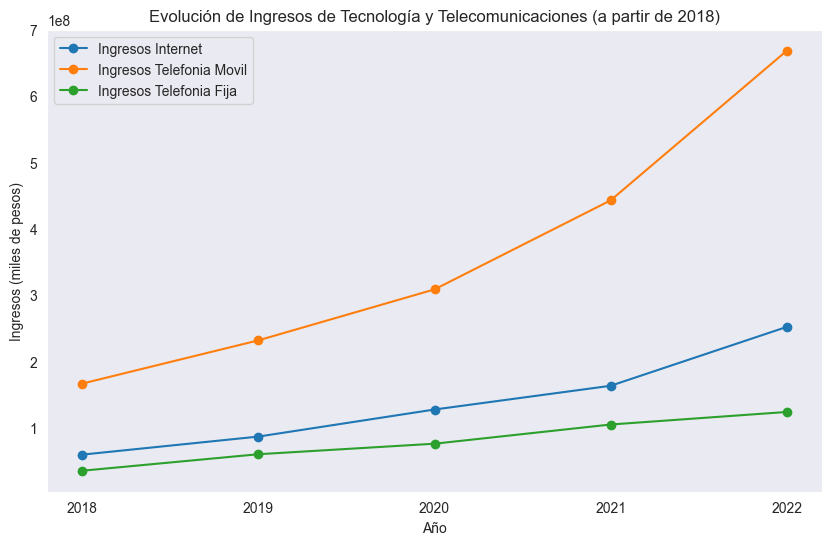

In [52]:
# Filtrar los datos a partir del año 2018
ingreso_tecnologia_2018 = ingreso_tecnologia[ingreso_tecnologia['Año'] >= 2018]

# Configurar y mostrar el gráfico de líneas
plt.figure(figsize=(10, 6))
# Graficar las columnas 'Ingresos Internet', 'Ingresos Telefonia Movil' y 'Ingresos Telefonia Fija'
plt.plot(ingreso_tecnologia_2018['Año'], ingreso_tecnologia_2018['Ingresos Internet'], label='Ingresos Internet', marker='o')
plt.plot(ingreso_tecnologia_2018['Año'], ingreso_tecnologia_2018['Ingresos Telefonia Movil'], label='Ingresos Telefonia Movil', marker='o')
plt.plot(ingreso_tecnologia_2018['Año'], ingreso_tecnologia_2018['Ingresos Telefonia Fija'], label='Ingresos Telefonia Fija', marker='o')
# Personalizar el gráfico
plt.title('Evolución de Ingresos de Tecnología y Telecomunicaciones (a partir de 2018)')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')
plt.legend()
# Establecer el eje x como enteros
plt.xticks(ingreso_tecnologia_2018['Año'].astype(int))
# Mostrar el gráfico
plt.grid()
plt.show()

Si bien todas las tecnologías han demostrado un crecimiento durante los ultimos 5 años, se observa que la que ha logrado generar la amyor rentabilidad es la de Telefonía Móvil. Es decir que la misma es la mejor opción para realizar inversiones.  

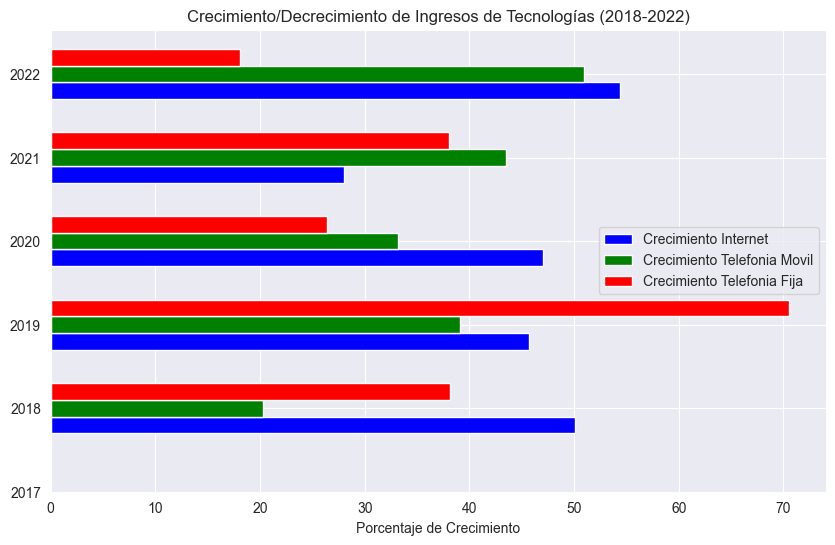

In [53]:
# Calcular la mediana de las tres categorías para el período filtrado
median_internet = ingreso_tecnologia.groupby('Año')['Ingresos Internet'].median()
median_movil = ingreso_tecnologia.groupby('Año')['Ingresos Telefonia Movil'].median()
median_fija = ingreso_tecnologia.groupby('Año')['Ingresos Telefonia Fija'].median()

# Calcular los porcentajes de crecimiento entre años para cada tecnología
growth_internet = (median_internet - median_internet.shift(1)) / median_internet.shift(1) * 100
growth_movil = (median_movil - median_movil.shift(1)) / median_movil.shift(1) * 100
growth_fija = (median_fija - median_fija.shift(1)) / median_fija.shift(1) * 100

# Configurar y mostrar la gráfica de barras agrupadas por año
fig, ax = plt.subplots(figsize=(10, 6))

# Ancho de las barras
bar_width = 0.2

# Coordenadas para las barras de las tres tecnologías
years = growth_internet.index
x1 = np.arange(len(years))
x2 = [x + bar_width for x in x1]
x3 = [x + bar_width for x in x2]

# Gráficos de barras para Internet, Telefonía Móvil y Telefonía Fija
ax.barh(x1, growth_internet, height=bar_width, color='blue', label='Crecimiento Internet')
ax.barh(x2, growth_movil, height=bar_width, color='green', label='Crecimiento Telefonia Movil')
ax.barh(x3, growth_fija, height=bar_width, color='red', label='Crecimiento Telefonia Fija')

# Configuración general de la gráfica
ax.set_yticks(x2)
ax.set_yticklabels(years)
ax.set_title('Crecimiento/Decrecimiento de Ingresos de Tecnologías (2018-2022)')
ax.set_xlabel('Porcentaje de Crecimiento')
ax.legend()

# Mostrar la gráfica
plt.show()

Este gráfico nos permite visualizar el crecimiento porcenetual anual de cada tecnología en ingresos generados.      
Observamos que para el año 2019, la telefonía fija habia crecido un 70 % pero empezó a decaer y al año 2022, su ingreso decayó hasta un 20%.            
En los dos últimos años, el Internet ha crecido casi el doble (pasando de aproximadamente 28 % a superar el 50 %)y la telefonía móvil tan solo ha sufrido un pequeño incremento.

# Denuncias y Reclamos

Debido a que la información conseguida solo hace referencia a los 3 primeros trimestres del año 2023, se hará un análisis más actual con respecto a los demás.

## *DF: reclamos_delegacion*

In [54]:
reclamos_delegacion

,Año,Mes,Delegación,Reclamos
0,2023,1,Bahía Blanca - Buenos Aires,8
1,2023,1,Catamarca,26
2,2023,1,Chaco,33
3,2023,1,Comodoro Rivadavia - Chubut,12
4,2023,1,Córdoba,190
...,...,...,...,...
246,2023,9,SAU - Subdirección de Atención al Usuario,550
247,2023,9,Tierra del Fuego,7
248,2023,9,Tucumán,47
249,2023,9,Viedma - Río Negro,47


In [55]:
# Convertir 'Mes' a trimestres
def convertir_a_trimestre(mes):
    if mes in range(1, 4):
        return 1
    elif mes in range(4, 7):
        return 2
    elif mes in range(7, 10):
        return 3
    else:
        return 4

reclamos_delegacion['Trimestre'] = reclamos_delegacion['Mes'].apply(convertir_a_trimestre)
reclamos_delegacion


,Año,Mes,Delegación,Reclamos,Trimestre
0,2023,1,Bahía Blanca - Buenos Aires,8,1
1,2023,1,Catamarca,26,1
2,2023,1,Chaco,33,1
3,2023,1,Comodoro Rivadavia - Chubut,12,1
4,2023,1,Córdoba,190,1
...,...,...,...,...,...
246,2023,9,SAU - Subdirección de Atención al Usuario,550,3
247,2023,9,Tierra del Fuego,7,3
248,2023,9,Tucumán,47,3
249,2023,9,Viedma - Río Negro,47,3


In [56]:
# Calcular la suma de reclamos por delegación
suma_reclamos_por_delegacion = reclamos_delegacion.groupby('Delegación')['Reclamos'].sum()

# Obtener la delegación con la mayor cantidad de reclamos
delegacion_max_reclamos = suma_reclamos_por_delegacion.idxmax()

# Imprimir la delegación con la mayor cantidad de reclamos
print("La delegación con la mayor cantidad de reclamos es:", delegacion_max_reclamos)

La delegación con la mayor cantidad de reclamos es: SAU - Subdirección de Atención al Usuario 


Podemos ver que la delegación con mayor cantidad de reclamos es SAU 'Subdirección de Atención al Ususario'. Pero la misma se encuentra en Capital Federal es por ello que se le reemplazará por esta última.

In [57]:
# Obtener los valores únicos de la columna "delegación"
valores_unicos = reclamos_delegacion['Delegación'].unique()
print(valores_unicos)

['Bahía Blanca - Buenos Aires' 'Catamarca' 'Chaco'
 'Comodoro Rivadavia - Chubut' 'Córdoba' 'Corrientes' 'Entre Ríos'
 'Formosa' 'General Pico - La Pampa' 'Jujuy' 'La Plata - Buenos Aires'
 'La Rioja' 'Mar del Plata - Buenos Aires' 'Mendoza' 'Misiones' 'Neuquén'
 'Rosario - Santa Fé' 'Salta' 'San Juan' 'San Luis' 'Santa Cruz'
 'Santa Fé' 'Santiago del Estero'
 'SAU - Subdirección de Atención al Usuario ' 'Tierra del Fuego' 'Tucumán'
 'Viedma - Río Negro' 'Bariloche - Rio Negro' 'La Pampa']


In [58]:
# Reemplazar los valores en la columna "Delegación"
reclamos_delegacion['Delegación'] = reclamos_delegacion['Delegación'].replace({"Bahía Blanca - Buenos Aires": "Buenos Aires",
                                                 "Comodoro Rivadavia - Chubut": "Chubut",
                                                 "General Pico - La Pampa": "La Pampa",
                                                 "La Plata - Buenos Aires": "Buenos Aires",
                                                 "Mar del Plata - Buenos Aires": "Buenos Aires",
                                                 "Rosario - Santa Fé": "Santa Fe",
                                                 "Santa Fé": "Santa Fe",
                                                 "Viedma - Río Negro": "Río Negro",
                                                 "Bariloche - Rio Negro": "Río Negro",
                                                 'SAU - Subdirección de Atención al Usuario ': "Capital Federal"})

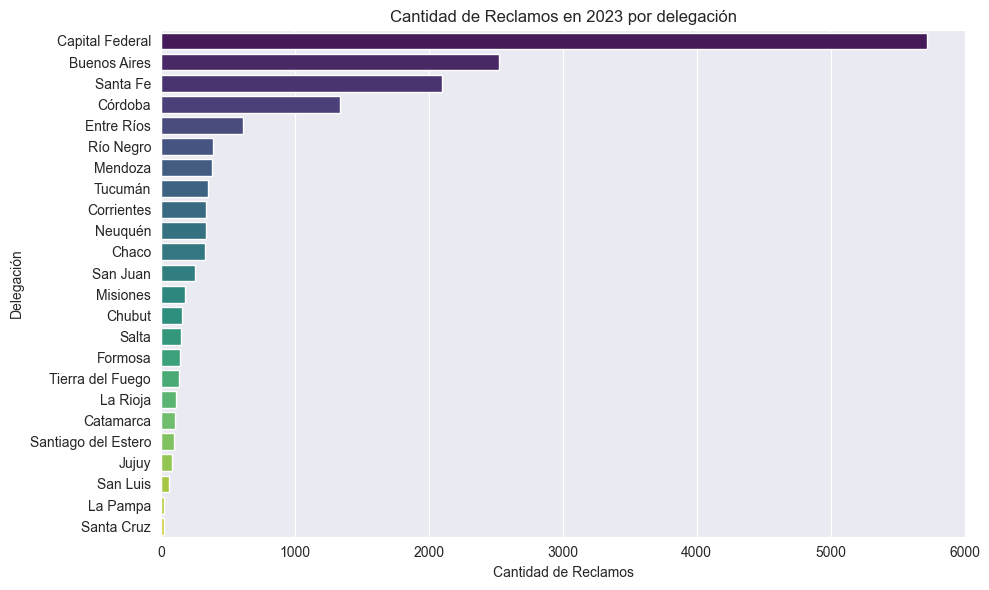

In [59]:
# Calcular la suma total de reclamos por delegación para todo el año
reclamos_por_delegacion_anual = reclamos_delegacion.groupby(['Delegación', 'Año'])['Reclamos'].sum().reset_index()
# Ordenar las delegaciones por la cantidad total de reclamos de mayor a menor
delegaciones_ordenadas = reclamos_por_delegacion_anual.groupby('Delegación')['Reclamos'].sum().reset_index()
delegaciones_ordenadas = delegaciones_ordenadas.sort_values(by='Reclamos', ascending=False)
# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
sns.barplot(data=delegaciones_ordenadas, x='Reclamos', y='Delegación', palette='viridis')
plt.title('Cantidad de Reclamos en 2023 por delegación')
plt.xlabel('Cantidad de Reclamos')
plt.ylabel('Delegación')
plt.tight_layout()
# Mostrar el gráfico
plt.savefig('./resources/cantidad_reclamos_delegación.jpg')
plt.show()


In [60]:
reclamos_delegacion

,Año,Mes,Delegación,Reclamos,Trimestre
0,2023,1,Buenos Aires,8,1
1,2023,1,Catamarca,26,1
2,2023,1,Chaco,33,1
3,2023,1,Chubut,12,1
4,2023,1,Córdoba,190,1
...,...,...,...,...,...
246,2023,9,Capital Federal,550,3
247,2023,9,Tierra del Fuego,7,3
248,2023,9,Tucumán,47,3
249,2023,9,Río Negro,47,3


In [61]:
# Crear una tabla dinámica
reclamos_delegacion = pd.pivot_table(reclamos_delegacion, values='Reclamos', index=['Trimestre', 'Año', 'Delegación'], aggfunc=sum).reset_index()
# Mostrar la tabla dinámica
reclamos_delegacion.to_csv('./Datasets KPI/reclamos_delegacion.csv',index=False)
reclamos_delegacion

,Trimestre,Año,Delegación,Reclamos
0,1,2023,Buenos Aires,1027
1,1,2023,Capital Federal,2508
2,1,2023,Catamarca,54
3,1,2023,Chaco,128
4,1,2023,Chubut,49
...,...,...,...,...
67,3,2023,Santa Cruz,5
68,3,2023,Santa Fe,437
69,3,2023,Santiago del Estero,18
70,3,2023,Tierra del Fuego,32


In [62]:
# Supongamos que tienes un DataFrame llamado 'data' con las columnas Año, Trimestre, Delegación y Reclamos
data=reclamos_delegacion
# Agrupa los datos por Delegación y Trimestre, y suma los reclamos en cada grupo
grouped_data = data.groupby(['Delegación', 'Trimestre'])['Reclamos'].sum().unstack()

# Calcula el porcentaje de reclamos entre los distintos trimestres
reclamos_delegacion_porc = grouped_data.pct_change(axis=1) * 100

# Esto dará como resultado un DataFrame con el porcentaje de cambio entre trimestres para cada delegación
reclamos_delegacion_porc.to_csv('./Datasets KPI/reclamos_delegacion_porc.csv',index=True)


In [63]:
reclamos_delegacion_porc.median()

Trimestre
1          NaN
2   -32.757739
3   -16.271373
dtype: float64

Podemos ver que la mediana es de -16.26 % para el último trimestre, por lo que se dice que la cantidad de reclamos van disminuyendo.           
Sin embargo no en todas las provincias disminuyó el número de reclamos durante el último trimestre, es por ello que nuestro objetivo será disminuirlo en todas aquellas delegaciones donde el reclamo aún sea positivo. En lo posible un 20 %.

# *DF: denuncias_tipo*

In [64]:
denuncias_tipo

,Año,Mes,Problemas técnicos,Facturación,Gestiones administrativas,Otros,Total mensual
0,2023,1,1240,504,407,105,2256
1,2023,2,1140,468,393,91,2092
2,2023,3,1384,633,433,168,2618
3,2023,4,842,440,294,106,1682
4,2023,5,777,434,293,94,1598
5,2023,6,665,399,320,92,1476
6,2023,7,648,379,291,88,1406
7,2023,8,656,368,288,81,1393
8,2023,9,743,341,260,91,1435


Nos muestra los tipos de denuncias que realizan los usuarios.

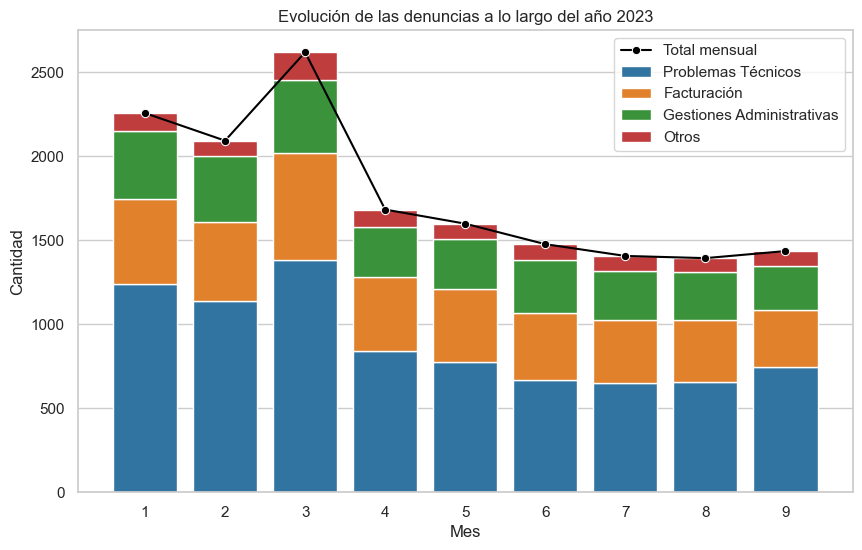

In [65]:
# Definir una paleta de colores personalizada
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")
# Configurar y mostrar el gráfico de barras apiladas
plt.figure(figsize=(10, 6))
# Agrupar los datos por mes y calcular la suma de cada tipo de denuncia
denuncias_tipo_sum = denuncias_tipo.groupby('Mes').sum().reset_index()
# Definir el orden de las categorías en el eje x
order = denuncias_tipo['Mes'].unique()
# Crear un gráfico de barras apiladas con colores personalizados
sns.barplot(data=denuncias_tipo_sum, x='Mes', y='Problemas técnicos', label='Problemas Técnicos', color=colors[0])
sns.barplot(data=denuncias_tipo_sum, x='Mes', y='Facturación', label='Facturación', color=colors[1], bottom=denuncias_tipo_sum['Problemas técnicos'])
sns.barplot(data=denuncias_tipo_sum, x='Mes', y='Gestiones administrativas', label='Gestiones Administrativas', color=colors[2], bottom=denuncias_tipo_sum['Problemas técnicos'] + denuncias_tipo_sum['Facturación'])
sns.barplot(data=denuncias_tipo_sum, x='Mes', y='Otros', label='Otros', color=colors[3], bottom=denuncias_tipo_sum['Problemas técnicos'] + denuncias_tipo_sum['Facturación'] + denuncias_tipo_sum['Gestiones administrativas'])
sns.lineplot(data=denuncias_tipo['Total mensual'], x=denuncias_tipo['Mes']-1, y=denuncias_tipo['Total mensual'], label='Total mensual', marker='o',color='black')
# Personalizar el gráfico
plt.title('Evolución de las denuncias a lo largo del año 2023')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.legend()
# Mostrar el gráfico
plt.show()

Se llega a la conclusión de que a partir del mes 3, o sea Marzo, del año 2023, las denuncias realizadas por los usuarios empezó a decrecer en todas los rubros. Esto puede haberse debido a un mejor funcionamiento de los equipos, a un mejor sistema de atención al cliente, entre otras. 

# *DF: reclamos_operador*

In [66]:
reclamos_operador

,Año,Mes,Motivo de Reclamo,Operador,Cantidad
0,2023,1,Facturación,AMX Argentina S.A. (Claro),16
1,2023,1,Facturación,DIRECTV Argentina S.A.L,4
2,2023,1,Facturación,Fibertel S.A. (TCI),8
3,2023,1,Facturación,Movistar - Telefonica Moviles Argentina S.A.,24
4,2023,1,Facturación,Otros,25
...,...,...,...,...,...
311,2023,9,Problemas Técnicos,Movistar - Telefonica Moviles Argentina S.A.,17
312,2023,9,Problemas Técnicos,Otros,58
313,2023,9,Problemas Técnicos,TELECENTRO S.A.,28
314,2023,9,Problemas Técnicos,Telecom Argentina S.A.,450


Este dataseet nos permite observar la cantidad de tipos de reclamos que recibe cada operador por mes. 

In [67]:
# Obtener los valores únicos de la columna "delegación"
valores_unicos = reclamos_operador['Operador'].unique()
print(valores_unicos)

['AMX Argentina S.A. (Claro)' 'DIRECTV Argentina S.A.L'
 'Fibertel S.A. (TCI)' 'Movistar - Telefonica Moviles Argentina S.A.'
 'Otros' 'TELECENTRO S.A.' 'Telecom Argentina S.A.'
 'Telefonica de Argentina S.A.' 'TELMEX Argentina S.A.' 'NSS S.A.'
 'SION S.A.' 'PRIMA' 'Advance Telecomunicaciones S.A. (Speedy)']


Debido a que por falta de información no puede hacerse una distinción entre si el reclamo pertence a telefonía fija, telefonía móvil, Internet u otro, analizaremos cuales son los operadores que poseen mayor cantidad de reclamos.

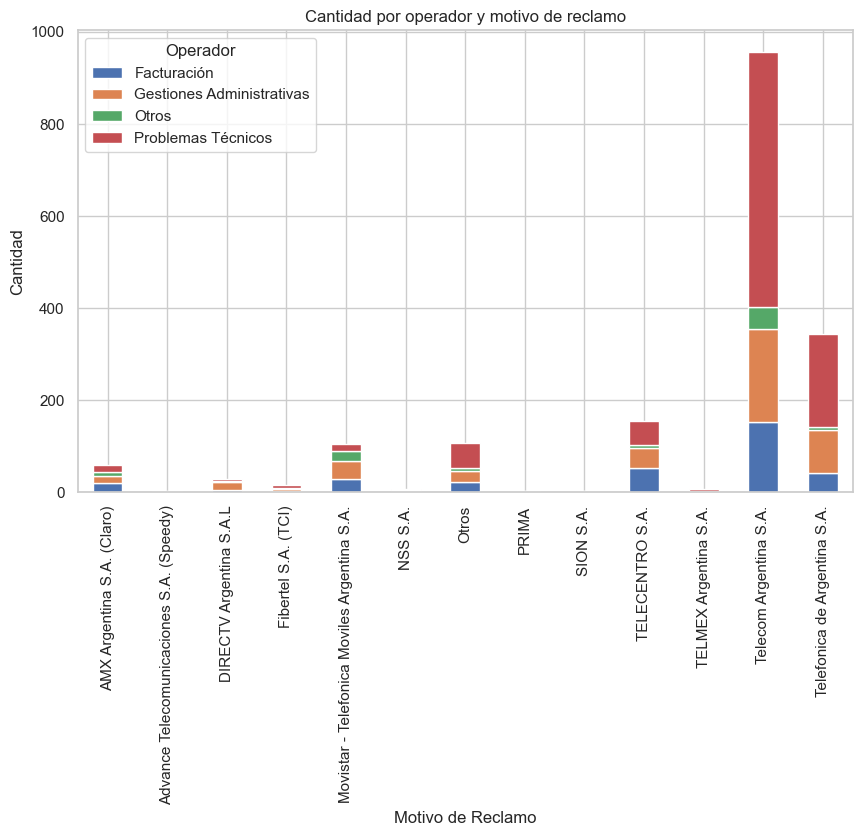

In [68]:
# Crear un gráfico de barras apiladas por motivo de reclamo
pivot_df = reclamos_operador.pivot_table(index='Operador', columns='Motivo de Reclamo', values='Cantidad', fill_value=0)
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
# Personalizar el gráfico
plt.title('Cantidad por operador y motivo de reclamo')
plt.xlabel('Motivo de Reclamo')
plt.ylabel('Cantidad')
plt.legend(title='Operador')
# Mostrar el gráfico
plt.show()


Este grafico nos permite visualizar que el operador Telecom Argentina S.A. es quien mayor cantidad de reclamos posee en todas los motivos. También permite ver que para cada operador la mayor cantidad de reclamos corresponde a problemas técnicos; esto indica que los equipos vienen con mal funcionamiento.

# *DF: reclamos_servicios*

In [69]:
reclamos_servicios

,Año,Mes,Telefonía Fija,Internet Fijo,Comunicaciones Moviles,TV por cable,Total mensual
0,2023,1,1161,694,257,144,2256
1,2023,2,1032,658,257,145,2092
2,2023,3,1262,819,366,171,2618
3,2023,4,849,469,257,107,1682
4,2023,5,775,472,253,98,1598
5,2023,6,712,477,223,64,1476
6,2023,7,648,421,245,92,1406
7,2023,8,647,395,263,88,1393
8,2023,9,668,469,214,84,1435


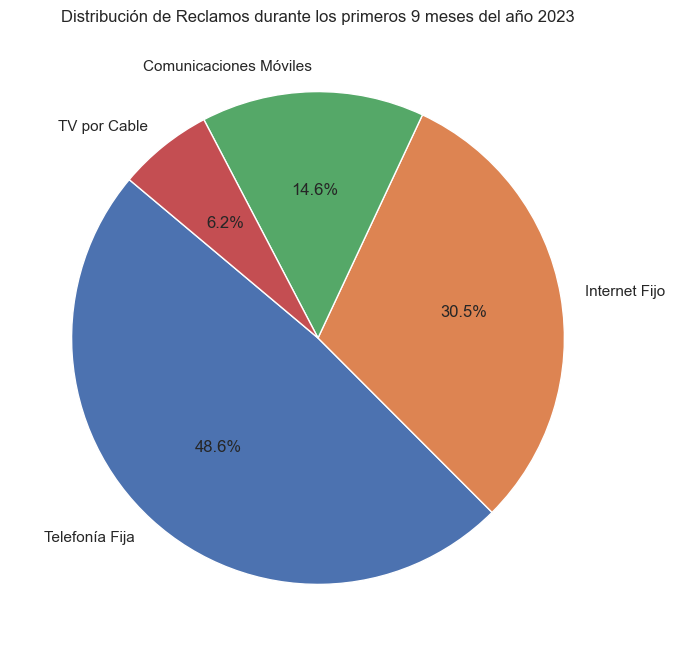

In [70]:
# Sumar cada columna para obtener el total mensual
reclamos_servicios['total mensual'] = reclamos_servicios.sum(axis=1)
# Calcular las sumas
suma_telefonia = reclamos_servicios['Telefonía Fija'].sum()
suma_internet = reclamos_servicios['Internet Fijo'].sum()
suma_moviles = reclamos_servicios['Comunicaciones Moviles'].sum()
suma_tv = reclamos_servicios['TV por cable'].sum()
# Etiquetas para la gráfica
etiquetas = ['Telefonía Fija', 'Internet Fijo', 'Comunicaciones Móviles', 'TV por Cable']
total = [suma_telefonia, suma_internet, suma_moviles, suma_tv]
# Crear un gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(total, labels=etiquetas, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Reclamos durante los primeros 9 meses del año 2023')
plt.show()

Se observa que de la cantidad de reclamos realizados desde enero a septiembre del 2023, casi el 50% de los reclamos corresponde al rubro de Telefonía Fija y seguido por el 30% de Internet Fijo.

# *Carga de Datasets para los KPI*

In [71]:
kpi1.to_csv('./Datasets KPI/kpi1.csv',index=True)
kpi2.to_csv('./Datasets KPI/kpi2.csv',index=False)
kpi2_aux.to_csv('./Datasets KPI/kpi2_aux.csv',index=False)